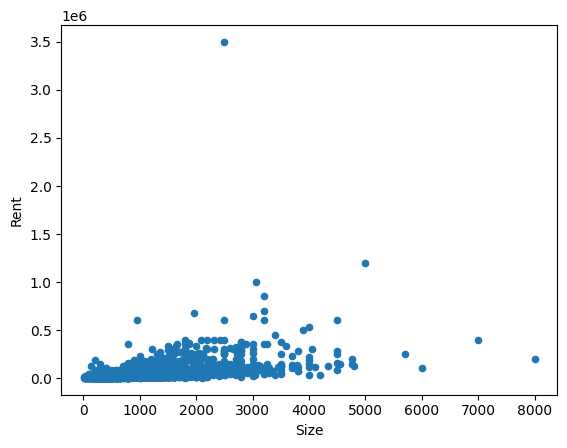

In [17]:
import kagglehub
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter

file = "House_Rent_Dataset.csv"

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS, "iamsouravbanerjee/house-rent-prediction-dataset", file)
df[["Posted On", "Rent", "Size"]].plot.scatter(x="Size", y="Rent")
plt.show()